In [45]:
import pandas as pd
import re

# Data Cleaning Steps

1. Create Unique ID for reviews/news/posts
2. Remove special characters
3. Lemmatization
4. Remove stopwords
5. TFIDF Vectorization

## 1. Cleaning trustpilot data

### Create Unique ID

In [227]:
df= pd.read_csv(r'Data\Uber_Trustpilot_Review.csv')
df.sample(5)

,review_page_number,reviewer_name,reviewer_review_count,review_location,star_rating,review_title,review,review_month,review_dat,review_year,review_source,company_name,company_website,company_website_html,total_reviews,avg_star_rating,total_review_pages
15264,671,Ebony Kisses,1,GB,1,I’ve been driving for over 15 years and…,Avoid this company,July,17,2020,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
12360,407,customer,2,US,1,Uber has owed me several hundred…,Uber has owed me several hundred dollars yet s...,August,20,2022,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
5641,810,Matthew Dange,1,HK,5,hooked,"i love it. living in LA, cabs used to be a sad...",June,30,2014,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
13220,451,Brian berriman,6,GB,5,Always reliable and easy use,NaN,July,27,2022,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
4210,705,Roberto Sanchez,2,US,1,Rude unproffesional drivers,"Rude unproffesional drivers, old dirty cars. D...",December,18,2019,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811


In [228]:
df.shape

(16207, 17)

In [229]:
df= df.reset_index()
df.rename(columns={'index':'UID'}, inplace= True)
df['UID']= ["TP_"+str(i) for i in df['UID']]
df.sample(3)


,UID,review_page_number,reviewer_name,reviewer_review_count,review_location,star_rating,review_title,review,review_month,review_dat,review_year,review_source,company_name,company_website,company_website_html,total_reviews,avg_star_rating,total_review_pages
3263,TP_3263,622,Dale Matschullat,1,US,1,Uber is broken,I booked a trip. I got a confirmation that my ...,March,27,2021,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
8623,TP_8623,196,Lindokuhle Ntshangase,1,ZA,5,Reliable,"Timeliness, reliable, easy to access and cheap...",March,4,2023,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
8182,TP_8182,172,bertthecat,9,GB,5,Breakfast suggestions.,"Our driver, Edwin, was friendly, chatty and in...",March,23,2023,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811


### Filter out reviews since 2021 in country United States

In [232]:
df= df[(df["review_year"]>= 2021) & (df["review_location"]== "US")]
df.shape

(6015, 18)

### Sepearate ID and reviews

In [251]:
UID= df['UID'].tolist()
reviews= df['review'].tolist()

print(len(UID))
print(len(reviews))

6015
6015


In [252]:
df[df['UID']=="NaN"]

,UID,review_page_number,reviewer_name,reviewer_review_count,review_location,star_rating,review_title,review,review_month,review_dat,review_year,review_source,company_name,company_website,company_website_html,total_reviews,avg_star_rating,total_review_pages


### Remove Special Characters (punctuations and emoji) and numbers

In [253]:
'''
import emoji
def remove_emoji (text):
    emoji_check= emoji.emoji_list(text) #("adsas 🤔 🤔")
    if (emoji_check==[]):
        return text 
    else:
        result=""
        for char in text:
            if(emoji.is_emoji(char)):
                continue
            else:
                result+=char
        return result
'''


'\nimport emoji\ndef remove_emoji (text):\n    emoji_check= emoji.emoji_list(text) #("adsas 🤔 🤔")\n    if (emoji_check==[]):\n        return text \n    else:\n        result=""\n        for char in text:\n            if(emoji.is_emoji(char)):\n                continue\n            else:\n                result+=char\n        return result\n'

In [254]:
def remove_emoji_punctuations(text):
    text= str(text)
     # Pattern to only match letters, and whitespaces.
    pattern = re.compile(r'[\W\d\s]+')
    #punctuation_pattern = re.compile(r'[^\w\s\d]')
    # Remove punctuations if match found
    return pattern.sub(' ', text)

reviews_without_spl_char= [remove_emoji_punctuations(i) for i in reviews]
len(reviews_without_spl_char)

6015

In [255]:
# Verification 

test= pd.DataFrame({
    "Review_Original": reviews,
    "Review_Without_Spl_Char": reviews_without_spl_char
})

test[test['Review_Original']!=test['Review_Without_Spl_Char']].to_excel("After Removing Spl Char Trustpilot.xlsx", index=False)

### Lemmatization and lower text

In [256]:
len(UID)
len(reviews_without_spl_char)

6015

In [257]:
reviews_without_spl_char[2]

'I was shown a price if and charged twice at first for this trip Which created a terrible morning experience for my grandmother seeing how this was a trip to get me something to smoke and grab her breakfast Uber was not as helpful or convenient as I usually find the service And I used to drive for the company In the end I was charged I just feel lied to is all '

In [258]:
#! pip install nltk
#import nltk
#nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

In [259]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("rocks")

def lemmatize(text):
    result=""
    for word in text.split():
        result+=lemmatizer.lemmatize(word.lower())+" "
    return result.strip()

reviews_lemmatized= [lemmatize(i) for i in reviews_without_spl_char]
len(reviews_lemmatized)

6015

In [260]:
# Verification 

test= pd.DataFrame({
    "reviews_without_spl_char": reviews_without_spl_char,
    "reviews_lemmatized": reviews_lemmatized
})

test[test['reviews_without_spl_char']!=test['reviews_lemmatized']].to_excel("After Lemmatizing V2.xlsx", index=False)

### Remove Stopwords

In [261]:
from nltk.corpus import stopwords

In [262]:
# Define stop word removal function and call it for the lemmatized text

nltk_stopwords= stopwords.words('english')
self_stopwords= ['uber', 'wa','go','tell','didnt','one','driver']
total_stopwords = nltk_stopwords + self_stopwords
print("Total Number of stop words:", len(total_stopwords))

def remove_stop_words(text):
    result=""
    for word in text.split():
        if(word not in total_stopwords):
            result+=word+" "
    return result.strip()

reviews_without_stop_words= [remove_stop_words(i) for i in reviews_lemmatized]
len(reviews_without_stop_words)

Total Number of stop words: 186


6015

In [263]:
# Verification 

test= pd.DataFrame({
    "reviews_with_stop_words": reviews_lemmatized,
    "reviews_without_stop_words": reviews_without_stop_words
})

test[test['reviews_with_stop_words']!=test['reviews_without_stop_words']].to_excel("After Removing Stop Words.xlsx", index=False)

### Word Cloud Comparision

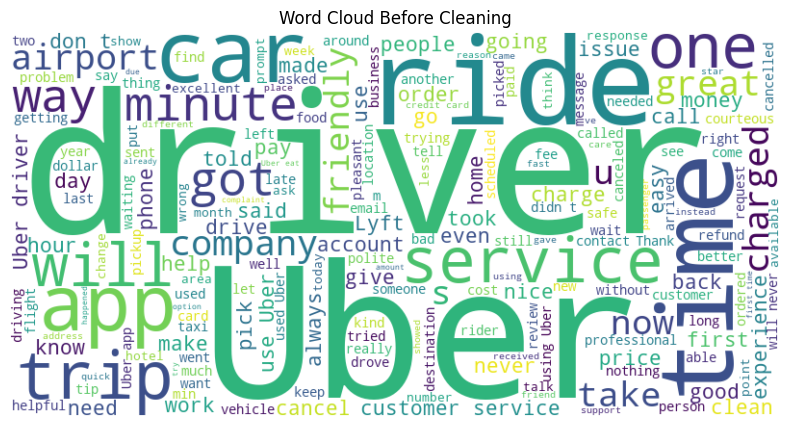

In [264]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Sample text data
text = "".join(str(i) for i in reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Before Cleaning")
plt.show()


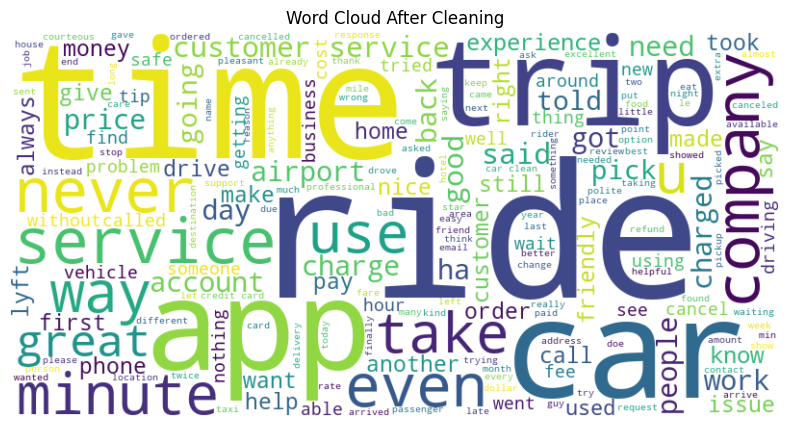

In [265]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = "".join(reviews_without_stop_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud After Cleaning")
plt.show()


### TFIDF Vectorization

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [267]:
input= 'content'
max_features= 500
max_df= 0.7 # Ignores the words with frequnce more than this number- Usefull to remove content specific stop words.

vectorizer= TfidfVectorizer(input=input, max_df=max_df, max_features=max_features)
doc_term= vectorizer.fit_transform(reviews_without_stop_words)

In [268]:
doc_term.shape

(6015, 500)

In [269]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accept', 'accepted', 'account', 'actually',
       'add', 'address', 'advance', 'ago', 'ahead', 'airport', 'allow',
       'almost', 'already', 'also', 'always', 'amazing', 'amount',
       'another', 'answer', 'anymore', 'anyone', 'anything', 'app',
       'appointment', 'appreciate', 'area', 'around', 'arrival', 'arrive',
       'arrived', 'ask', 'asked', 'asking', 'attempt', 'available',
       'away', 'awesome', 'back', 'background', 'bad', 'bag', 'bank',
       'best', 'better', 'big', 'bit', 'black', 'block', 'book', 'booked',
       'booking', 'business', 'busy', 'cab', 'call', 'called', 'calling',
       'came', 'cancel', 'canceled', 'cancellation', 'cancelled',
       'cannot', 'car', 'card', 'care', 'case', 'cash', 'cause', 'change',
       'changed', 'charge', 'charged', 'charging', 'chat', 'cheaper',
       'check', 'city', 'clean', 'close', 'cold', 'come', 'comfortable',
       'coming', 'communication', 'company', 'complaint', 'complete',
   

In [282]:
doc_term_df= pd.DataFrame(doc_term.toarray(), columns=vectorizer.get_feature_names_out())
doc_term_df['UID']= UID
# Make UID as the first column
doc_term_df= doc_term_df[['UID']+list(doc_term_df.columns[:-1])]
doc_term_df.sample(4)

,UID,able,absolutely,accept,accepted,account,actually,add,address,advance,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
4238,TP_11574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2633,TP_8505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3131,TP_9491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3078,TP_9418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Saving the vectorizer and doc_term matrix for later use (Specifically in LDA)

from scipy import sparse
sparse.save_npz('doc_term_sparse.npz', doc_term)
#loaded_doc_term = sparse.load_npz('doc_term_sparse.npz')

import pickle
# Save the vectorizer to a file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
"""
# Load the vectorizer from the file
with open('vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
"""

### Save document term matrix and remaining columns seperately

In [284]:
df_without_review = df.drop(columns=['review'])
df_without_review.head()

,UID,review_page_number,reviewer_name,reviewer_review_count,review_location,star_rating,review_title,review_month,review_dat,review_year,review_source,company_name,company_website,company_website_html,total_reviews,avg_star_rating,total_review_pages
2,TP_2,1,Priyanka Suryaneni,5,US,2,Uber India is a scam,February,1,2024,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
3,TP_3,1,Gary Davis,1,US,5,UBER Made Our Trip GREAT!!!,January,28,2024,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
7,TP_7,1,Fharo Gold,1,US,2,I was shown a price if $28 and charged…,January,29,2024,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
13,TP_13,1,Jeff Ostergaard,1,US,3,Why is it that when Uber is busy you…,January,24,2024,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811
14,TP_14,1,Nel A,1,US,3,Quote Price not same as charge,January,7,2024,Trustpilot,Uber,www.uber.com,http://www.uber.com?utm_medium=company_profile...,23919,3.0,811


In [285]:
df_without_review.to_csv('Data\Cleaned_Data\TrustPilot_Cleaned_Review_Info.csv', index=False)
doc_term_df.to_csv('Data\Cleaned_Data\TrustPilot_Cleaned_Doc_Term.csv', index=False)